# GBC classification
In this notebook I'm going to classify the data with the Gradient Boosting classifier. I will obtain some metrics and plots to analyze the performance and I will compare the distribution of the real data and the one obtained with the classification.

## R&D dataset 
### Loading the data 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, log_loss, recall_score, plot_confusion_matrix,classification_report, f1_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Loading the data
df = pd.read_csv("..\data\RD_dataset.csv")
df.shape

(512000, 18)

In [3]:
df.head()

,pT_j1,m_j1,eta_j1,phi_j1,E_j1,tau_21_j1,nhadrons_j1,pT_j2,m_j2,eta_j2,phi_j2,E_j2,tau_21_j2,nhadrons_j2,m_jj,deltaR_j12,n_hadrons,label
0,1286.727685,106.912129,0.185508,-2.763676,1313.290435,0.624659,36,1283.220733,63.164215,0.064989,0.393688,1287.481934,0.713248,33,2580.489568,3.159663,109.0,0.0
1,1354.394070,614.269108,0.826505,1.365524,1943.559886,0.311688,84,1325.613761,439.064150,-0.874319,-1.786248,1916.370744,0.276881,97,3859.315047,3.581406,208.0,0.0
2,1214.955723,645.865619,-0.196786,2.040545,1396.840654,0.238205,119,1072.462085,113.768840,0.143831,-1.090330,1089.530630,0.726963,59,2480.769725,3.149348,196.0,0.0
3,1285.227873,516.835248,0.328693,2.975321,1450.485926,0.013429,65,1220.251279,174.796077,0.294854,-0.322661,1285.618789,0.706361,89,2609.893413,3.298155,183.0,0.0
4,1210.415787,129.499352,-0.744836,-2.883347,1567.345300,0.423550,54,1091.785816,155.362262,1.060534,0.264977,1772.340209,0.787662,57,3313.488835,3.629229,169.0,1.0


**Separating the data** into a training data set and a test data set:

In [4]:
from sklearn.preprocessing import MinMaxScaler
from benchtools.src.datatools import separate_data

X, y = separate_data(df, standarize=False)
X_train_m, X_test_m, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# I eliminate the columns of mass so that the training is model-free 
X_train = X_train_m.drop(['m_j1', 'm_j2', 'm_jj'], axis=1)
X_test = X_test_m.drop(['m_j1', 'm_j2', 'm_jj'], axis=1)

# Standarizing the variables
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns])

In [5]:
X_train.head()

,pT_j1,eta_j1,phi_j1,E_j1,tau_21_j1,nhadrons_j1,pT_j2,eta_j2,phi_j2,E_j2,tau_21_j2,nhadrons_j2,deltaR_j12,n_hadrons
269950,0.023766,0.447932,0.572749,0.026637,0.194259,0.177165,0.236204,0.319188,0.073249,0.228341,0.187415,0.170732,0.468489,0.135043
501714,0.163466,0.512338,0.824834,0.110933,0.288922,0.240157,0.329691,0.687570,0.317613,0.344764,0.245672,0.178862,0.495242,0.184615
381639,0.073016,0.411868,0.253741,0.062484,0.412827,0.244094,0.282658,0.334711,0.745132,0.259233,0.184162,0.321138,0.446029,0.249573
449407,0.014362,0.379798,0.973110,0.043124,0.493650,0.244094,0.242288,0.251246,0.438868,0.310071,0.313793,0.272358,0.524856,0.244444
175477,0.066394,0.255427,0.177565,0.216971,0.459898,0.074803,0.166781,0.368110,0.719979,0.130329,0.703020,0.186992,0.533256,0.150427


Seeing if the distribution of classes coincide in both data sets 

In [6]:
print('y_train class distribution')
print(y_train.value_counts(normalize=True))

print('y_test class distribution')
print(y_test.value_counts(normalize=True))

y_train class distribution
0.0    0.908714
1.0    0.091286
Name: label, dtype: float64
y_test class distribution
0.0    0.908711
1.0    0.091289
Name: label, dtype: float64


### Classification
We define the classifier, train it and make predictions 

In [7]:
clf = GradientBoostingClassifier()
name = clf.__class__.__name__

# Training the classifier
clf.fit(X_train, y_train)

# Getting the predictions
y_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

Now I'm going to obtain metrics to see how the classification when: 

In [8]:
print(classification_report(y_test, y_pred, target_names=['fondo','señal']))

              precision    recall  f1-score   support

       fondo       0.96      0.99      0.97    139578
       señal       0.82      0.57      0.67     14022

    accuracy                           0.95    153600
   macro avg       0.89      0.78      0.82    153600
weighted avg       0.95      0.95      0.95    153600



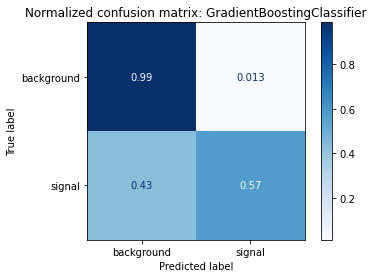

In [9]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['background','signal'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title("Normalized confusion matrix: {}".format(name))
plt.show()

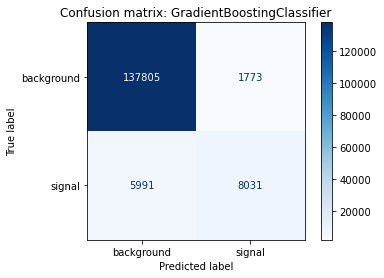

In [10]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=['background','signal'],
                             cmap=plt.cm.Blues,
                             normalize=None)

disp.ax_.set_title("Confusion matrix: {}".format(name))

plt.show()

In [11]:
precision = precision_score(y_test, y_pred)
ll = log_loss(y_test, y_proba)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.2%} \n Log score: {:.4f} \n F1 score: {:.4f}".format(precision ,ll, f1))

Precision: 81.92% 
 Log score: 0.1377 
 F1 score: 0.6741


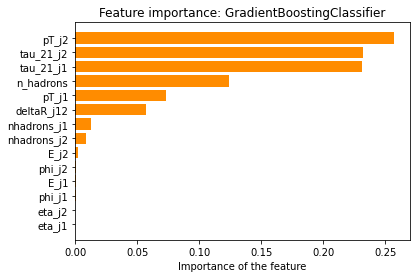

In [12]:
# Getting the score of each variable
fi_gb = clf.feature_importances_.tolist()
weight = [ round(elem, 3) for elem in fi_gb ]
features = X_train.columns.tolist()
scores = list(zip(features, weight))

# Sorting: greater to lower score
scores.sort(key=lambda x: x[1], reverse=False) 

# Saving the names and scores and rearanging
features = list(zip(*scores))[0]
score = list(zip(*scores))[1]
x_pos = np.arange(len(features)) 

# Plotting
plt.barh(x_pos, score,align='center', color = 'darkorange')
plt.yticks(x_pos, features) 
plt.xlabel('Importance of the feature')
plt.title('Feature importance: {}'.format(name))
plt.show()

### Plots

#### ROC and AUC
Graphing the ROC curve and obtaining the AUC score 

In [13]:
from benchtools.src.metrictools import rejection_plot, inverse_roc_plot, significance_plot, precision_recall_plot

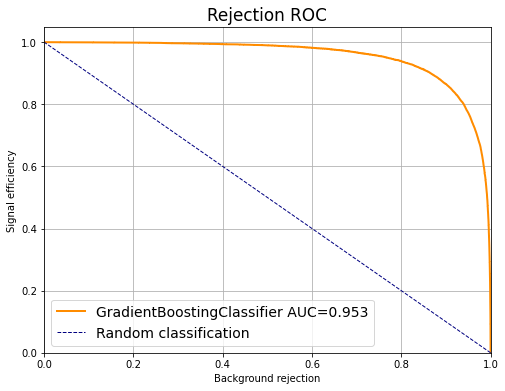

In [14]:
rejection_plot(names=name, labels=y_test, probs=y_proba[:, 1])
plt.show()

Graphing another type of ROC

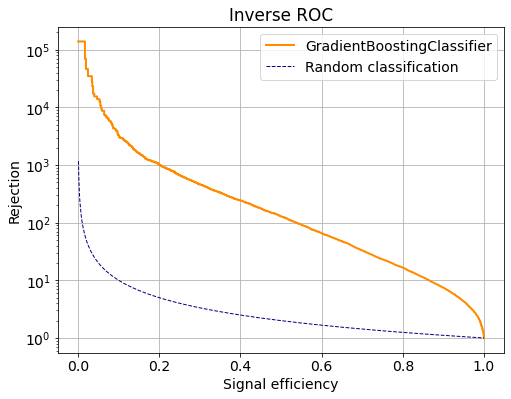

In [15]:
inverse_roc_plot(names=name, labels=y_test, probs=y_proba[:, 1])
plt.show()

The significance

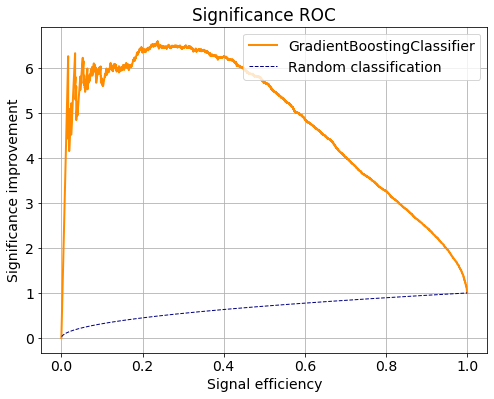

In [16]:
significance_plot(names=name, labels=y_test, probs=y_proba[:, 1])
plt.show()

And the precision-recall curve

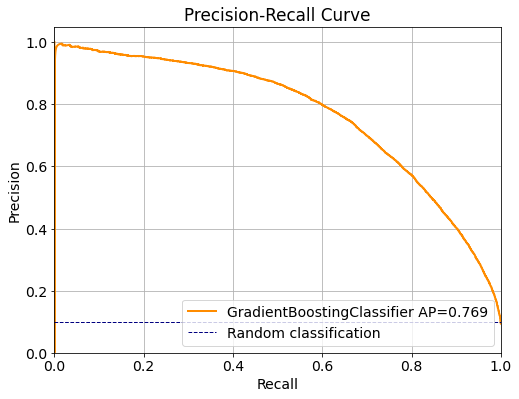

In [17]:
precision_recall_plot(names=name, labels=y_test, probs=y_proba[:, 1])
plt.show()

### Distributions
Plotting the distributions **after classification** 

In [18]:
df_test = df.iloc[y_test.index].copy()

X_test_m['y_pred'] = y_pred
X_test_m['label'] = y_test

X_test_m.head()

,pT_j1,m_j1,eta_j1,phi_j1,E_j1,tau_21_j1,nhadrons_j1,pT_j2,m_j2,eta_j2,phi_j2,E_j2,tau_21_j2,nhadrons_j2,m_jj,deltaR_j12,n_hadrons,y_pred,label
58904,1245.335366,589.122521,-0.591652,2.566940,1583.408925,0.252553,100,1113.805169,61.245864,0.801365,-0.797360,1492.250629,0.301229,31,3054.421585,3.641292,191.0,0.0,0.0
474643,1490.167755,123.532076,0.163960,0.372214,1515.286474,0.709907,39,1419.495073,60.903034,0.001545,-2.751416,1420.802678,0.440108,27,2924.658648,3.127850,109.0,0.0,0.0
505755,1436.961210,101.657847,-0.488022,0.427252,1614.704990,0.620576,31,1061.226122,282.394158,0.430838,-2.555102,1195.095384,0.343264,88,2765.624632,3.120696,195.0,0.0,0.0
467650,1261.358720,218.808374,1.172695,1.354259,2243.439433,0.726776,51,1201.313206,287.944492,-1.255317,-1.732465,2296.971844,0.347862,112,4538.534805,3.927227,234.0,0.0,0.0
453815,1300.249334,232.676144,0.123892,2.329810,1330.740280,0.933545,64,1224.618066,150.389562,-0.065651,-0.714245,1236.438223,0.409710,42,2561.831397,3.049950,183.0,0.0,0.0


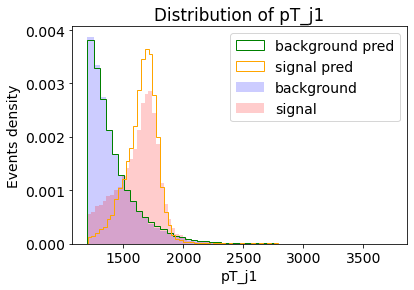

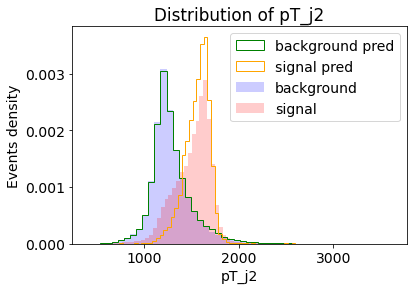

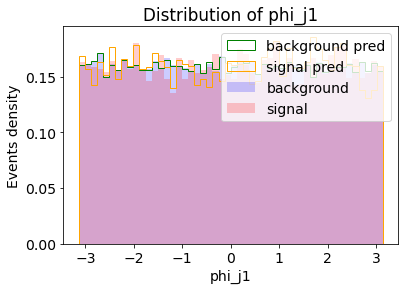

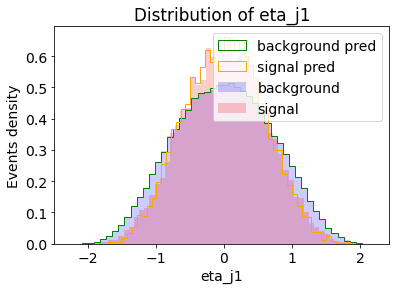

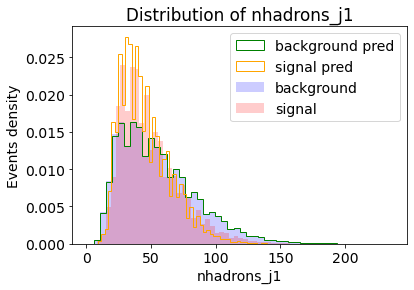

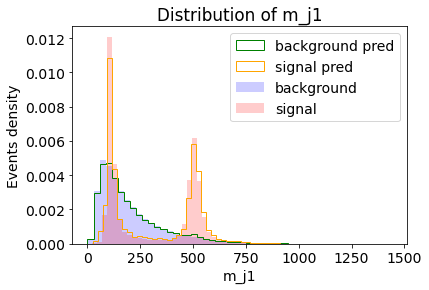

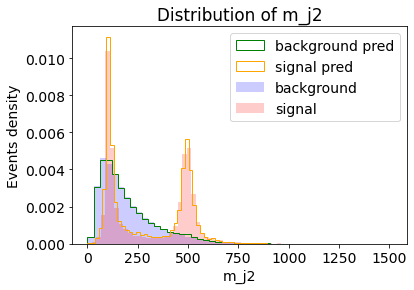

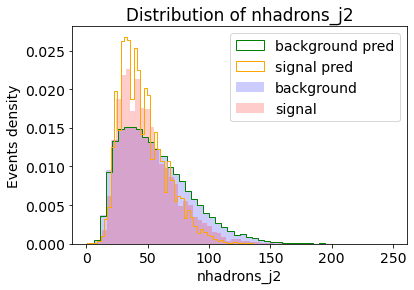

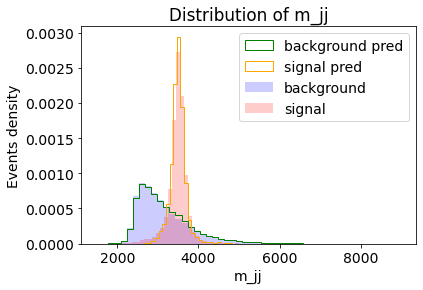

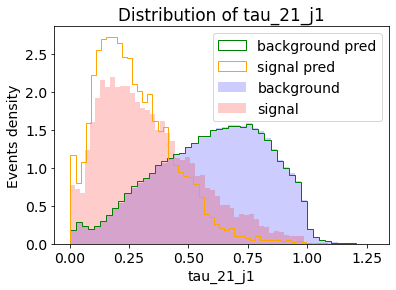

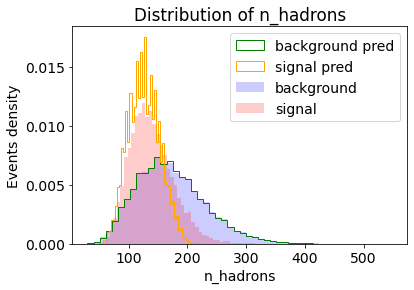

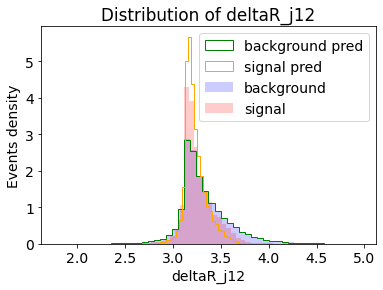

In [19]:
from benchtools.src.plotools import pred_test_hist

variables = ['pT_j1', 'pT_j2', 'phi_j1', 'eta_j1', 'nhadrons_j1',  
         'm_j1', 'm_j2', 'nhadrons_j2', 'm_jj','tau_21_j1', 
         'n_hadrons', 'deltaR_j12']

for variable in variables:
    pred_test_hist(X_test_m, variable, ytest='label')

## BB1 Classification
Now that the algorithm is trained, the BB1 dataset can be classified

In [20]:
# Importing the data
df_bb = pd.read_csv("..\data\BB1_dataset.csv")
df_bb.shape

(512000, 18)

In [21]:
# Separating the data
X_bb_m, y_label = separate_data(df_bb, standarize=False)
# Removing the mass
X_bb = X_bb_m.drop(['m_j1', 'm_j2', 'm_jj'], axis=1)
# Standarizing the variables
X_bb[X_bb.columns] = scaler.fit_transform(X_bb[X_bb.columns])

In [22]:
# Getting predictions
y_pred_bb = clf.predict(X_bb)
y_proba_bb = clf.predict_proba(X_bb)

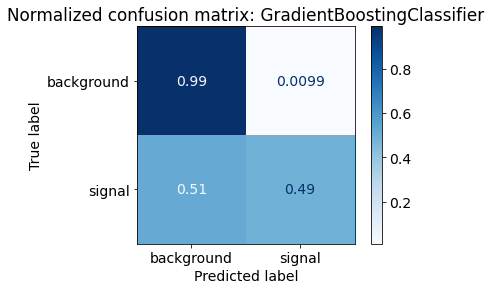

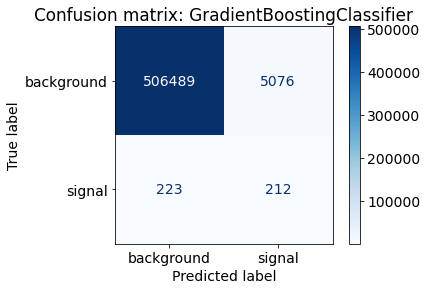

In [23]:
# Plotting the confusion matrix
disp = plot_confusion_matrix(clf, X_bb, y_label,
                                 display_labels=['background','signal'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title("Normalized confusion matrix: {}".format(name))
plt.show()

disp = plot_confusion_matrix(clf, X_bb, y_label,
                             display_labels=['background','signal'],
                             cmap=plt.cm.Blues,
                             normalize=None)

disp.ax_.set_title("Confusion matrix: {}".format(name))

plt.show()

In [24]:
X_bb_m['label'] = y_label
X_bb_m['y_pred'] = y_pred_bb

X_bb_m.head()

,pT_j1,m_j1,eta_j1,phi_j1,E_j1,tau_21_j1,nhadrons_j1,pT_j2,m_j2,eta_j2,phi_j2,E_j2,tau_21_j2,nhadrons_j2,m_jj,deltaR_j12,n_hadrons,label,y_pred
0,1397.005228,170.225610,-0.765391,0.537239,1834.490410,0.543602,70,1347.988973,427.365520,0.225140,-2.740281,1446.853969,0.880080,82,3157.841212,3.423930,230.0,0.0,0.0
1,1273.332773,327.845663,0.354693,-0.951367,1393.391014,0.403889,77,1034.297905,106.489303,-0.364250,2.119474,1108.799742,0.927609,44,2488.262160,3.153878,156.0,0.0,0.0
2,1268.472197,72.622808,-1.055852,-0.319414,2045.001255,0.685529,21,1133.216562,456.691841,0.738184,2.727534,1526.179769,0.073868,54,3499.867409,3.535882,134.0,0.0,0.0
3,1414.022037,208.706758,-0.428495,2.622507,1559.858883,0.405329,81,1364.308129,60.057918,-0.242186,-0.992484,1405.798737,0.638481,39,2729.477504,3.619790,247.0,0.0,0.0
4,1220.274012,170.788218,-0.076185,-1.373332,1235.676617,0.466025,38,1210.723592,402.915624,-0.275398,1.633799,1319.927141,0.097154,34,2513.728451,3.013722,148.0,0.0,0.0


### Plots

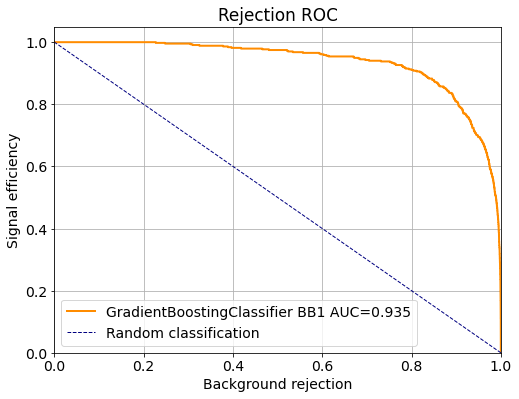

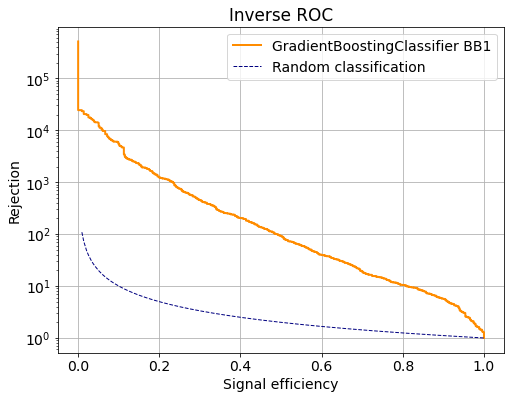

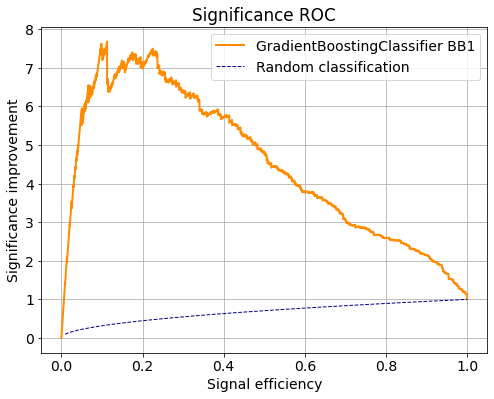

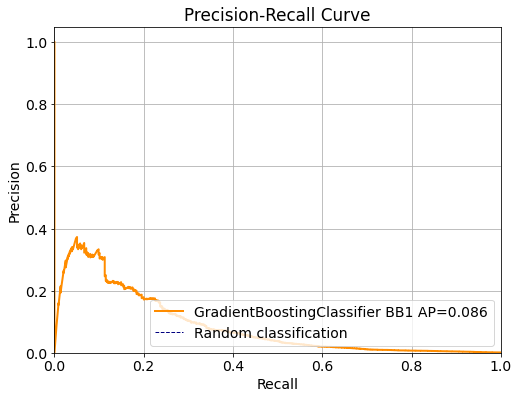

In [25]:
name=name+' BB1'

rejection_plot(names=name, labels=y_label, probs=y_proba_bb[:, 1])
plt.show()

inverse_roc_plot(names=name, labels=y_label, probs=y_proba_bb[:, 1])
plt.show()

significance_plot(names=name, labels=y_label, probs=y_proba_bb[:, 1])
plt.show()

precision_recall_plot(names=name, labels=y_label, probs=y_proba_bb[:, 1])
plt.show()

### Distributions

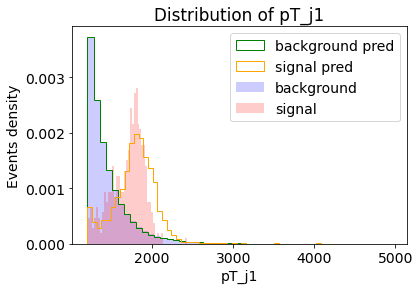

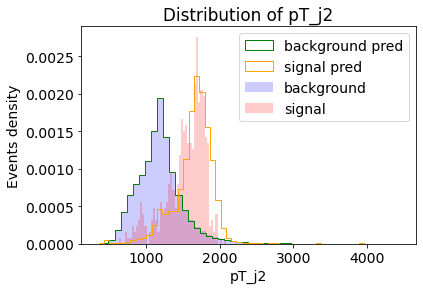

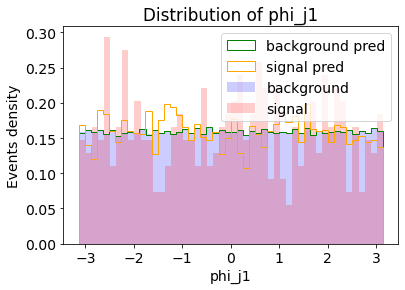

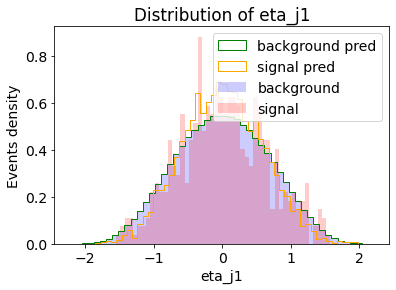

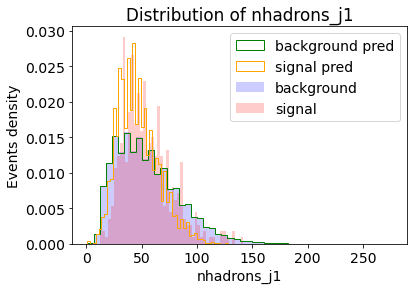

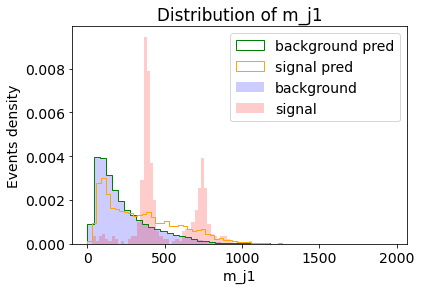

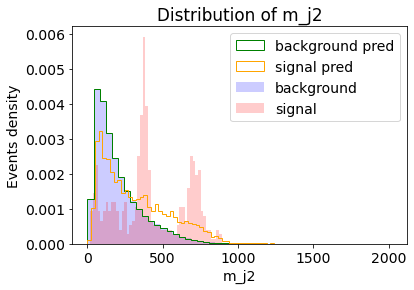

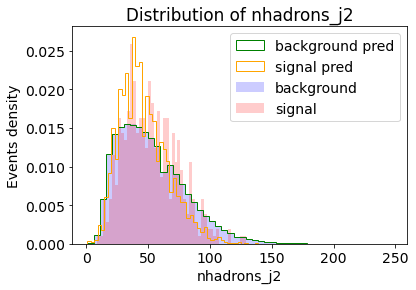

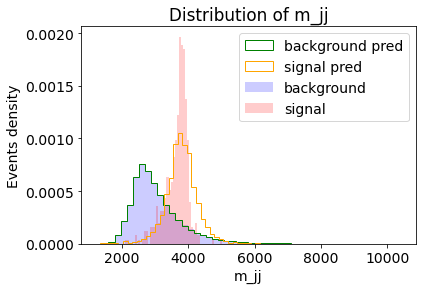

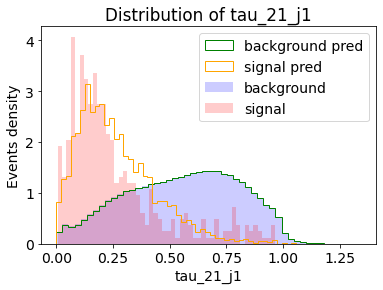

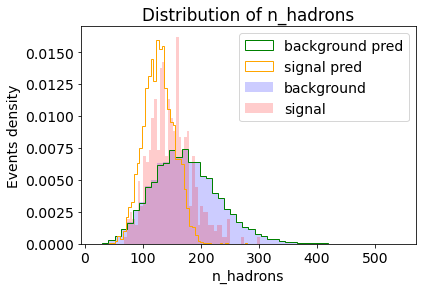

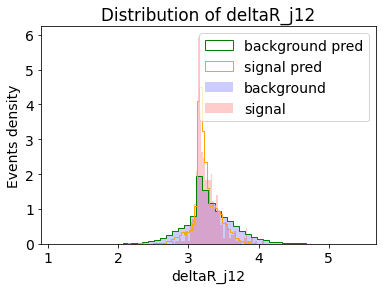

In [26]:
variables = ['pT_j1', 'pT_j2', 'phi_j1', 'eta_j1', 'nhadrons_j1',  
         'm_j1', 'm_j2', 'nhadrons_j2', 'm_jj','tau_21_j1', 
         'n_hadrons', 'deltaR_j12']

for variable in variables:
    pred_test_hist(X_bb_m, variable, ytest='label')